# Eksperyment prostych deskryptorów kształtu

## Porównywanie do wzorca - wszystkie deskryptory

In [1]:
import shape_classifier as sc
import simple_shape_descriptors as ssd
from sklearn.metrics import classification_report

In [2]:
X_train, y_train, X_test, y_test = ssd.prepare_dataset()
clf = sc.ShapeClassifier()
clf.fit(X_train, y_train)

In [3]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       01_bmw       1.00      0.23      0.38        13
       02_kia       0.67      0.67      0.67        12
03_mitsubishi       0.17      0.29      0.21        14
     04_volvo       0.50      0.50      0.50         8
  05_peugeout       0.08      0.12      0.10         8
     06_honda       0.06      0.12      0.08         8
    07_subaru       0.42      0.33      0.37        15
     08_tesla       0.57      0.33      0.42        12
   09_renault       0.08      0.12      0.10         8
    10_toyota       0.20      0.07      0.11        14

     accuracy                           0.29       112
    macro avg       0.37      0.28      0.29       112
 weighted avg       0.40      0.29      0.30       112



In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '01_bmw'),
  Text(1, 0, '02_kia'),
  Text(2, 0, '03_mitsubishi'),
  Text(3, 0, '04_volvo'),
  Text(4, 0, '05_peugeout'),
  Text(5, 0, '06_honda'),
  Text(6, 0, '07_subaru'),
  Text(7, 0, '08_tesla'),
  Text(8, 0, '09_renault'),
  Text(9, 0, '10_toyota')])

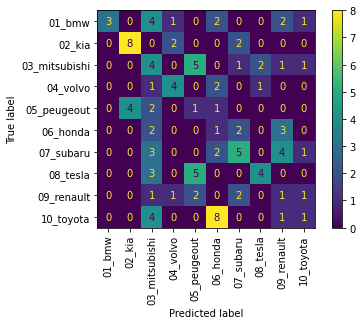

In [5]:
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)
plt.xticks(rotation=90)

## Podzbiór deskryptorów

Tylko solidity (Solidity is the ratio of contour area to its convex hull area.), compactness (zwartość), roundness (kołowość), mimośród (eccentricity).

In [6]:
clf = sc.ShapeClassifier(limited=True)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       01_bmw       1.00      0.92      0.96        13
       02_kia       0.00      0.00      0.00        12
03_mitsubishi       0.56      0.36      0.43        14
     04_volvo       0.78      0.88      0.82         8
  05_peugeout       0.33      0.25      0.29         8
     06_honda       0.80      1.00      0.89         8
    07_subaru       0.52      0.87      0.65        15
     08_tesla       0.53      0.83      0.65        12
   09_renault       1.00      0.75      0.86         8
    10_toyota       1.00      1.00      1.00        14

     accuracy                           0.69       112
    macro avg       0.65      0.69      0.65       112
 weighted avg       0.64      0.69      0.65       112



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '01_bmw'),
  Text(1, 0, '02_kia'),
  Text(2, 0, '03_mitsubishi'),
  Text(3, 0, '04_volvo'),
  Text(4, 0, '05_peugeout'),
  Text(5, 0, '06_honda'),
  Text(6, 0, '07_subaru'),
  Text(7, 0, '08_tesla'),
  Text(8, 0, '09_renault'),
  Text(9, 0, '10_toyota')])

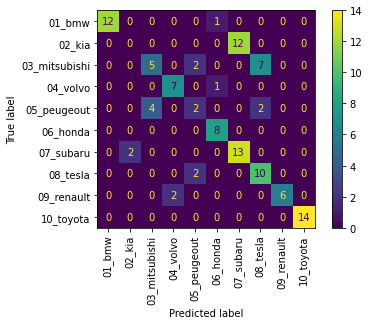

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)
plt.xticks(rotation=90)

## Drzewo decyzyjne

In [17]:
from sklearn import tree

X_train_descriptors = [sc.ShapeClassifier.calculate_shape_descriptors(x) for x in X_train]
X_test_descriptors = [sc.ShapeClassifier.calculate_shape_descriptors(x) for x in X_test]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_descriptors, y_train)

In [18]:
y_pred = clf.predict(X_test_descriptors)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       01_bmw       1.00      0.92      0.96        13
       02_kia       0.67      0.67      0.67        12
03_mitsubishi       1.00      1.00      1.00        14
     04_volvo       1.00      0.88      0.93         8
  05_peugeout       0.36      0.50      0.42         8
     06_honda       0.67      1.00      0.80         8
    07_subaru       0.79      1.00      0.88        15
     08_tesla       1.00      0.67      0.80        12
   09_renault       1.00      0.62      0.77         8
    10_toyota       1.00      0.86      0.92        14

     accuracy                           0.83       112
    macro avg       0.85      0.81      0.82       112
 weighted avg       0.87      0.83      0.84       112



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '01_bmw'),
  Text(1, 0, '02_kia'),
  Text(2, 0, '03_mitsubishi'),
  Text(3, 0, '04_volvo'),
  Text(4, 0, '05_peugeout'),
  Text(5, 0, '06_honda'),
  Text(6, 0, '07_subaru'),
  Text(7, 0, '08_tesla'),
  Text(8, 0, '09_renault'),
  Text(9, 0, '10_toyota')])

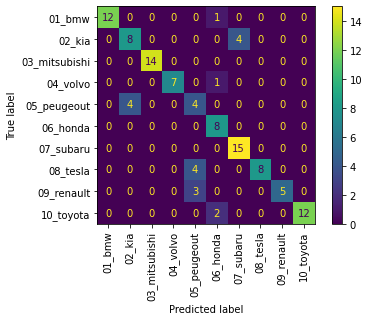

In [19]:
plot_confusion_matrix(clf, X_test_descriptors, y_test)
plt.xticks(rotation=90)